In [1]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten

2024-10-30 13:32:44.330190: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
file = h5py.File('xy.h5', 'r')

x = file['x'][:]
y = file['y'][:]

x.shape, y.shape

((50000, 3674), (50000,))

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((40000, 3674), (40000,), (10000, 3674), (10000,))

In [4]:
model = Sequential([
    Input(shape=(3674,)),
    Embedding(input_dim=4096, output_dim=64, mask_zero=True),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3674, 64)          262144    
                                                                 
 flatten (Flatten)           (None, 235136)            0         
                                                                 
 dense (Dense)               (None, 1)                 235137    
                                                                 
Total params: 497281 (1.90 MB)
Trainable params: 497281 (1.90 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
optimizer = Adam(learning_rate=.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy','mse'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=32, batch_size=8192)

Epoch 1/32
5/5 [==============================] - 24s 5s/step - loss: 0.7041 - accuracy: 0.5015 - mse: 0.2554 - val_loss: 0.7073 - val_accuracy: 0.5000 - val_mse: 0.2570
Epoch 2/32
5/5 [==============================] - 23s 5s/step - loss: 0.6995 - accuracy: 0.5007 - mse: 0.2531 - val_loss: 0.7015 - val_accuracy: 0.5000 - val_mse: 0.2541
Epoch 3/32
5/5 [==============================] - 23s 5s/step - loss: 0.6954 - accuracy: 0.5023 - mse: 0.2511 - val_loss: 0.6975 - val_accuracy: 0.5000 - val_mse: 0.2521
Epoch 4/32
5/5 [==============================] - 28s 6s/step - loss: 0.6943 - accuracy: 0.5039 - mse: 0.2506 - val_loss: 0.6935 - val_accuracy: 0.5005 - val_mse: 0.2502
Epoch 5/32
5/5 [==============================] - 23s 5s/step - loss: 0.6927 - accuracy: 0.5091 - mse: 0.2498 - val_loss: 0.6919 - val_accuracy: 0.5276 - val_mse: 0.2494
Epoch 6/32
5/5 [==============================] - 23s 5s/step - loss: 0.6918 - accuracy: 0.5096 - mse: 0.2493 - val_loss: 0.6919 - val_accuracy: 0.523

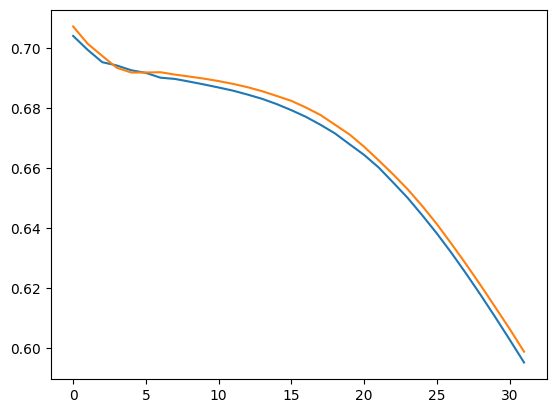

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.show()